# ASAP
### Andrew's Sentiment Analysis Project

## Import the Libraries


In [13]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re 
import string 

import seaborn as sns
import plotly.express as px

!pip install nltk
import nltk 
from nltk.tokenize import sent_tokenize
from nltk.corpus import words 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.sentiment.util import *

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Import the Data

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv')

In [15]:
df.shape

(179108, 13)

In [16]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [17]:
df = df[['user_name', 'date', 'text']]
df.head()

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


In [18]:
df.user_name = df.user_name.astype('category')

df.user_name = df.user_name.cat.codes 

df.date = pd.to_datetime(df.date).dt.date

df.head()

,user_name,date,text
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


## Process the Texts

In [19]:
text = df['text']

In [20]:
remove_url = lambda x: re.sub(r'https\S+', '', str(x))

text = text.apply(remove_url)

to_low = lambda x: x.lower()

text = text.apply(to_low)

#### Remove Punctuation

In [21]:
remove_puncs = lambda x: x.translate(str.maketrans('','', string.punctuation))

text = text.apply(remove_puncs)

#### Remove stopwords

In [22]:
word_list = ['covid', '#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19']

stop_words = set(stopwords.words('english'))

stop_words.update(word_list)

remove_words = lambda x: ' '.join([word for word in x.split() if word not in stop_words])

text = text.apply(remove_words)

new_list = [word for line in text for word in line.split()]

In [26]:
import collections
from collections import Counter

In [27]:
word_counts = Counter(new_list).most_common(50)
word_counts

[('covid19', 106202),
 ('cases', 18596),
 ('new', 14683),
 ('coronavirus', 14176),
 ('amp', 11907),
 ('people', 9053),
 ('pandemic', 7869),
 ('deaths', 7429),
 ('us', 7245),
 ('health', 5188),
 ('one', 4825),
 ('positive', 4773),
 ('total', 4701),
 ('today', 4420),
 ('get', 4365),
 ('need', 4178),
 ('covid19…', 4143),
 ('like', 4042),
 ('india', 3999),
 ('2020', 3830),
 ('help', 3809),
 ('mask', 3735),
 ('realdonaldtrump', 3608),
 ('day', 3558),
 ('last', 3540),
 ('time', 3431),
 ('vaccine', 3403),
 ('news', 3306),
 ('trump', 3295),
 ('many', 3263),
 ('world', 3255),
 ('know', 3025),
 ('first', 2951),
 ('update', 2916),
 ('reported', 2909),
 ('august', 2892),
 ('due', 2880),
 ('masks', 2848),
 ('even', 2736),
 ('spread', 2735),
 ('virus', 2706),
 ('still', 2671),
 ('number', 2638),
 ('back', 2596),
 ('tested', 2522),
 ('testing', 2518),
 ('lockdown', 2511),
 ('death', 2474),
 ('please', 2472),
 ('good', 2453)]

In [30]:
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'freq']

px.bar(words_df, x= 'word', y = 'freq', title = 'Most Common Words and Freq')

## Sentiment Analysis

In [32]:
df.text = text
analyzer = SentimentIntensityAnalyzer()
polar_analyzer = lambda x: analyzer.polarity_scores(x)

sentiment_score = df.text.apply(polar_analyzer)

sentiment_df = pd.DataFrame(data = list(sentiment_score))

sentiment_df.head()

,neg,neu,pos,compound
0,0.00,0.758,0.242,0.4939
1,0.11,0.709,0.181,0.2263
2,0.00,0.846,0.154,0.2057
3,0.00,0.592,0.408,0.7351
4,0.00,0.813,0.187,0.3182


### Label Score Based on Polarity

In [34]:
labelize = lambda x : 'neutral' if x== 0 else ('positive' if x > 0 else 'negative')

sentiment_df['label'] = sentiment_df['compound'].apply(labelize)

sentiment_df.head()

,neg,neu,pos,compound,label
0,0.00,0.758,0.242,0.4939,positive
1,0.11,0.709,0.181,0.2263,positive
2,0.00,0.846,0.154,0.2057,positive
3,0.00,0.592,0.408,0.7351,positive
4,0.00,0.813,0.187,0.3182,positive


### Join the Dataframe

In [35]:
data = df.join(sentiment_df.label)

data.head()

,user_name,date,text,label
0,89755,2020-07-25,smelled scent hand sanitizers today someone pa...,positive
1,76403,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...,positive
2,76147,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...,positive
3,84572,2020-07-25,brookbanktv one gift covid19 give appreciation...,positive
4,18398,2020-07-25,25 july media bulletin novel coronavirusupdate...,positive


### Visualization 

In [37]:
counts_df = data.label.value_counts().reset_index()

counts_df

,index,label
0,positive,70047
1,neutral,62520
2,negative,46541


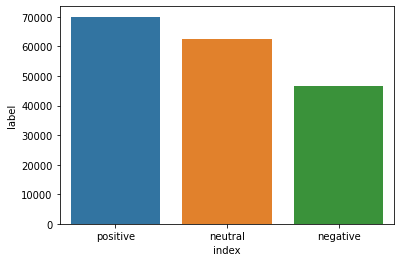

In [38]:
sns.barplot(x = 'index', y = 'label', data = counts_df)

data_agg = data[['user_name', 'date', 'label']].groupby(['date', 'label']).count().reset_index()

data_agg.columns = ['date', 'label', 'counts']

In [39]:
px.line(data_agg, x = 'date', y = 'counts', color = 'label', title = 'Daily Tweets Sentiment Analysis')

### Acknowledgement 

*This project was inspired by the Sentiment Analysis on COVID-19 Tweets Project on Coursera. Coded by Andrew Chen. Credit to Ahmad Varasteh *